**Import required libaries**

In [ ]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping


Using TensorFlow backend.


**Connect to drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Read json formate Data**

In [ ]:
# Loading Data
import pandas as pd
df = pd.read_json (r'/content/drive/My Drive/news.json',lines=True)
df


,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


In [ ]:
import pandas as pd
df = pd.read_json (r'/content/drive/My Drive/news.json',lines=True)
df = df[['category','headline','short_description']]
df

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."
...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,Verizon Wireless and AT&T are already promotin...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,"Afterward, Azarenka, more effusive with the pr..."
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...","Leading up to Super Bowl XLVI, the most talked..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,CORRECTION: An earlier version of this story i...


In [ ]:
# Selecting data
df = df[['category','headline','short_description']]
df

,category,headline,short_description
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,She left her husband. He killed their children...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Of course it has a song.
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,The actor and his longtime girlfriend Anna Ebe...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,The actor gives Dems an ass-kicking for not fi...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,"The ""Dietland"" actress said using the bags is ..."
...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,Verizon Wireless and AT&T are already promotin...
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,"Afterward, Azarenka, more effusive with the pr..."
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...","Leading up to Super Bowl XLVI, the most talked..."
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,CORRECTION: An earlier version of this story i...


**Data Tranformation**

In [ ]:
# Data transformation
df['text'] = df['headline'] + df['short_description']
df = df[['category','text']]
df.head()

,category,text
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 5...
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...


**group by category, count checking**

In [ ]:
df.groupby('category').count()

,text
category,
ARTS,1509
ARTS & CULTURE,1339
BLACK VOICES,4528
BUSINESS,5937
COLLEGE,1144
COMEDY,5175
CRIME,3405
CULTURE & ARTS,1030
DIVORCE,3426


**Merging ambiguous categories**

In [ ]:
# Data Transformation - Merging ambiguous categories 
df = df.replace({'category' : { 'ARTS & CULTURE' : 'ARTS', 'CULTURE & ARTS' : 'ARTS' }})
df = df.replace({'category' : { 'LATINO VOICES' : 'VOICES', 'BLACK VOICES' : 'VOICES', 'QUEER VOICES' : 'VOICES' }})
df = df.replace({'category' : { 'MONEY' : 'BUSINESS'}})
df = df.replace({'category' : { 'COLLEGE' : 'EDUCATION' }})
df = df.replace({'category' : { 'GREEN' : 'ENVIRONMENT' }})
df = df.replace({'category' : { 'TASTE' : 'FOOD','FOOD & DRINK': 'FOOD' }})
df = df.replace({'category' : { 'HEALTHY LIVING' : 'WELLNESS' }})
df = df.replace({'category' : { 'PARENTS' : 'PARENTING' }})
df = df.replace({'category' : { 'HOME & LIVING' : 'LIVING' }})
df = df.replace({'category' : { 'STYLE & BEAUTY' : 'STYLE' }})
df = df.replace({'category' : { 'THE WORLDPOST' : 'WORLD NEWS', 'WORLDPOST' : 'WORLD NEWS' }})

**20 categories**

In [ ]:
df = df.loc[df['category'].isin(['ARTS','BUSINESS','CRIME','EDUCATION','SPORTS','ENVIRONMENT','FOOD','WELLNESS','STYLE','TECH','WOMEN','LIVING','IMPACT','PARENTING','RELIGION','SCIENCE','TRAVEL','POLITICS','WEDDINGS','ENTERTAINMENT'])]

In [ ]:
df.groupby('category').count()

,text
category,
ARTS,3878
BUSINESS,7644
CRIME,3405
EDUCATION,2148
ENTERTAINMENT,16058
ENVIRONMENT,3945
FOOD,8322
IMPACT,3459
LIVING,4195


**Visualization Categories count**

<BarContainer object of 20 artists>

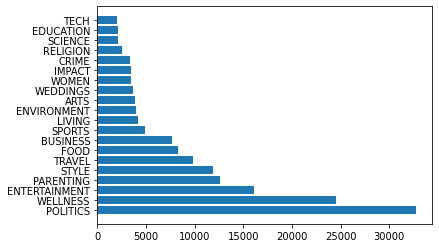

In [ ]:
df1 = df.category.value_counts()
df1 = pd.DataFrame({'category':df1.index, 'count':df1.values})

import matplotlib.pyplot as plt
plt.barh(df1['category'],df1['count'])

In [ ]:
(df1.category.value_counts()).count()

20

In [ ]:
import numpy as np
no_of_categories = 2000
jumble = df.reindex(np.random.permutation(df.index))
ARTS = jumble[jumble['category'] == 'ARTS'][:no_of_categories]
BUSINESS = jumble[jumble['category'] == 'BUSINESS'][:no_of_categories]
EDUCATION = jumble[jumble['category'] == 'EDUCATION'][:no_of_categories]
CRIME = jumble[jumble['category'] == 'CRIME'][:no_of_categories]
SPORTS = jumble[jumble['category'] == 'SPORTS'][:no_of_categories]
WELLNESS = jumble[jumble['category'] == 'WELLNESS'][:no_of_categories]
FOOD = jumble[jumble['category'] == 'FOOD'][:no_of_categories]
TECH = jumble[jumble['category'] == 'TECH'][:no_of_categories]
STYLE = jumble[jumble['category'] == 'STYLE'][:no_of_categories]
ENVIRONMENT = jumble[jumble['category'] == 'ENVIRONMENT'][:no_of_categories]
ENTERTAINMENT = jumble[jumble['category'] == 'ENTERTAINMENT'][:no_of_categories]

WOMEN = jumble[jumble['category'] == 'WOMEN'][:no_of_categories]
LIVING = jumble[jumble['category'] == 'LIVING'][:no_of_categories]
IMPACT = jumble[jumble['category'] == 'IMPACT'][:no_of_categories]
PARENTING = jumble[jumble['category'] == 'PARENTING'][:no_of_categories]
POLITICS = jumble[jumble['category'] == 'POLITICS'][:no_of_categories]
RELIGION = jumble[jumble['category'] == 'RELIGION'][:no_of_categories]
SCIENCE = jumble[jumble['category'] == 'SCIENCE'][:no_of_categories]
TRAVEL = jumble[jumble['category'] == 'TRAVEL'][:no_of_categories]
WEDDINGS = jumble[jumble['category'] == 'WEDDINGS'][:no_of_categories] 


merged = pd.concat([ARTS,BUSINESS,EDUCATION,CRIME,SPORTS,WELLNESS,FOOD,TECH,STYLE,ENVIRONMENT,ENTERTAINMENT,WOMEN,LIVING,IMPACT,PARENTING,POLITICS,RELIGION,SCIENCE,TRAVEL,WEDDINGS], ignore_index=True)
#Shuffle the dataset
merged = merged.reindex(np.random.permutation(merged.index))
merged['LABEL'] = 0

**Assign label**

In [ ]:
merged.loc[merged['category'] == 'ARTS', 'LABEL'] = 0
merged.loc[merged['category'] == 'BUSINESS', 'LABEL'] = 1
merged.loc[merged['category'] == 'EDUCATION', 'LABEL'] = 2
merged.loc[merged['category'] == 'CRIME', 'LABEL'] = 3
merged.loc[merged['category'] == 'SPORTS', 'LABEL'] = 4
merged.loc[merged['category'] == 'WELLNESS', 'LABEL'] = 5
merged.loc[merged['category'] == 'FOOD', 'LABEL'] = 6
merged.loc[merged['category'] == 'TECH', 'LABEL'] = 7
merged.loc[merged['category'] == 'STYLE', 'LABEL'] = 8
merged.loc[merged['category'] == 'ENVIRONMENT', 'LABEL'] = 9

merged.loc[merged['category'] == 'WOMEN', 'LABEL'] = 10
merged.loc[merged['category'] == 'LIVING', 'LABEL'] = 11
merged.loc[merged['category'] == 'IMPACT', 'LABEL'] = 12
merged.loc[merged['category'] == 'PARENTIING', 'LABEL'] = 13
merged.loc[merged['category'] == 'POLITICS', 'LABEL'] = 14
merged.loc[merged['category'] == 'RELIGION', 'LABEL'] = 15
merged.loc[merged['category'] == 'SCIENCE', 'LABEL'] = 16
merged.loc[merged['category'] == 'TRAVEL', 'LABEL'] = 17
merged.loc[merged['category'] == 'WEDDINGS', 'LABEL'] = 18
merged.loc[merged['category'] == 'ENTERTAINMENT', 'LABEL'] = 19

print(merged['LABEL'][:10])
labels = to_categorical(merged['LABEL'], num_classes=20)
print(labels[:20])
if 'category' in merged.keys():
    merged.drop(['category'], axis=1)

348       0
38226    18
20844    19
21521    19
2194      1
33165    15
3364      1
3007      1
8622      4
24464    11
Name: LABEL, dtype: int64
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 

**Tokenization**

In [ ]:
n_most_common_words = 15000
max_len = 50
# Removing punctuation from the text 
tokenizer = Tokenizer(num_words=n_most_common_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(merged['text'].values)
sequences = tokenizer.texts_to_sequences(merged['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 78012 unique tokens.


**Splitting data**

In [ ]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.20, random_state=42)

In [ ]:
epochs = 35
emb_dim = 100
batch_size = 50

In [ ]:
model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(100, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(20, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           1500000   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2020      
Total params: 1,582,420
Trainable params: 1,582,420
Non-trainable params: 0
_________________________________________________________________
None


**Train model**

In [ ]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25600 samples, validate on 6400 samples
Epoch 1/35
25600/25600 [==============================] - 47s 2ms/step - loss: 2.9412 - acc: 0.0965 - val_loss: 2.9165 - val_acc: 0.0986
Epoch 2/35
25600/25600 [==============================] - 46s 2ms/step - loss: 2.8424 - acc: 0.1171 - val_loss: 2.6411 - val_acc: 0.1739
Epoch 3/35
25600/25600 [==============================] - 46s 2ms/step - loss: 2.6590 - acc: 0.1592 - val_loss: 2.4734 - val_acc: 0.2319
Epoch 4/35
25600/25600 [==============================] - 46s 2ms/step - loss: 2.5199 - acc: 0.1982 - val_loss: 2.3375 - val_acc: 0.2661
Epoch 5/35
25600/25600 [==============================] - 46s 2ms/step - loss: 2.4243 - acc: 0.2237 - val_loss: 2.2016 - val_acc: 0.3267
Epoch 6/35
25600/25600 [==============================] - 46s 2ms/step - loss: 2.3132 - acc: 0.2613 - val_loss: 2.0597 - val_acc: 0.3708
Epoch 7/35
25600/25600 [==============================] - 46s 2ms/step - loss: 2.2000 - acc: 0.2996 - val_loss: 1.9660 - val_acc:

**Evaluate model performance**

In [ ]:
print(history)

In [ ]:
accur = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accur[0],accur[1]))

8000/8000 [==============================] - 3s 377us/step
Test set
  Loss: 1.454
  Accuracy: 0.621


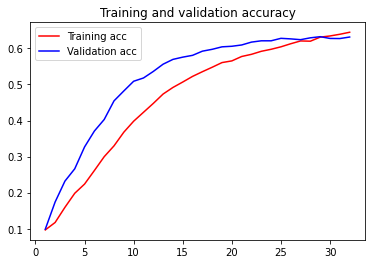

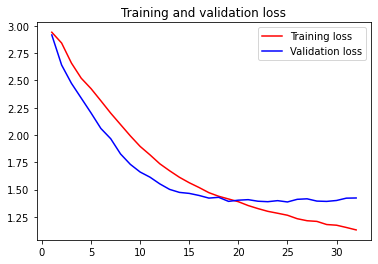

In [ ]:

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')
plt.legend()

plt.show()

**Confusion Matrix**

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
predicted = model.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test.argmax(axis=1), predicted.argmax(axis=1)))

from IPython.display import display
pd.options.display.max_columns = None
display(cm)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,493,4,23,5,10,35,15,22,19,7,24,37,11,15,15,7,19,10,37
1,14,197,16,4,7,26,20,50,3,15,12,14,8,23,5,2,5,2,5
2,27,12,280,11,15,12,8,7,0,3,8,4,7,10,4,3,2,0,3
3,10,2,6,300,6,1,2,8,0,4,6,1,7,13,8,2,0,3,9
4,4,5,5,9,298,2,7,7,3,2,3,3,2,7,7,4,1,1,19
5,36,13,10,2,4,216,31,4,5,9,13,20,14,6,6,13,5,4,1
6,7,2,1,0,5,5,296,1,0,2,1,17,0,0,0,4,9,1,6
7,20,13,4,5,7,5,14,290,1,4,5,12,1,10,0,13,2,4,10
8,25,9,0,0,4,9,11,4,285,3,8,62,1,3,2,3,1,9,12
9,15,12,1,5,9,6,6,1,0,266,0,19,5,7,2,30,27,1,3


**Predict Category on random input**

*assign any input text. for example i have given news headline and model predicted correctly that given input belongs to "Business" categories  *

In [ ]:
txt = ["The coronavirus will push the euro zone economy into an unprecedented peacetime slump, European Central Bank chief Christine Lagarde said today, vowing to use all the bank's tools to help combat the downturn."]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['ENTERTAINMENT', 'BUSINESS', 'LIVING', 'ARTS','WELLNESS']
print(pred, labels[np.argmax(pred)])

[[2.75130937e-04 9.11123335e-01 2.47273427e-02 1.01765741e-04
  8.26341056e-05 3.94957792e-03 1.21609622e-03 2.98607331e-02
  2.31509548e-05 1.33656710e-03 5.11441962e-04 1.15249735e-04
  2.34042630e-02 1.86114857e-09 2.70619383e-03 1.67871054e-04
  5.94443482e-05 3.10774049e-04 1.93183641e-05 9.03067212e-06]] BUSINESS


**Thank you**

\\
(![alt text](https://media-exp1.licdn.com/dms/image/C561BAQGEbzpXZ34-gQ/company-background_10000/0?e=2159024400&v=beta&t=o3vOn3Ye-qpqlDH64A1of1_aRAQ8TunahPQ4ZWuISRI))